In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Alp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.drop('customerID', 1)

In [11]:
df.shape

(7032, 20)

In [61]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [13]:
df2 = pd.get_dummies(df)

In [14]:
df2.shape

(7032, 46)

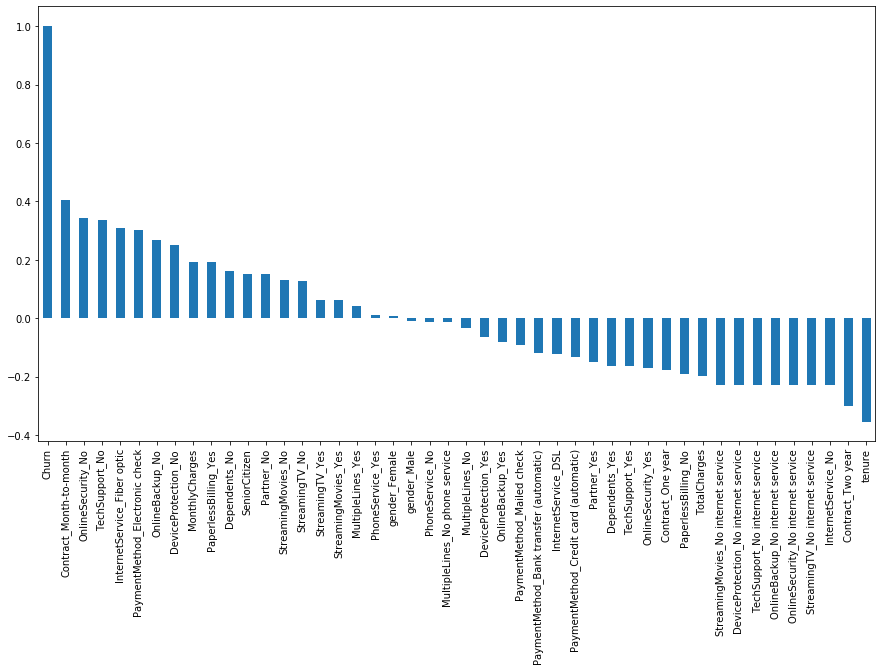

In [15]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

In [16]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [17]:
df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [19]:
df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

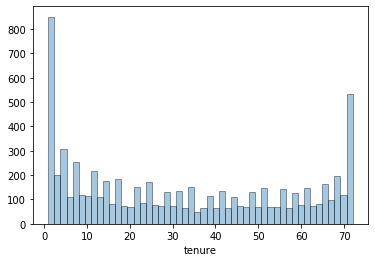

In [20]:
sns.distplot(df['tenure'], hist = True, kde = False, bins = 50, hist_kws={'edgecolor':'black'});

In [21]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

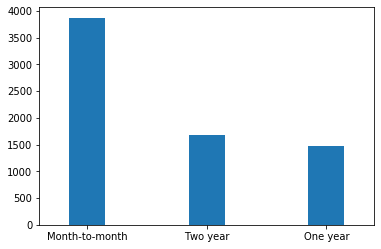

In [22]:
df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3);

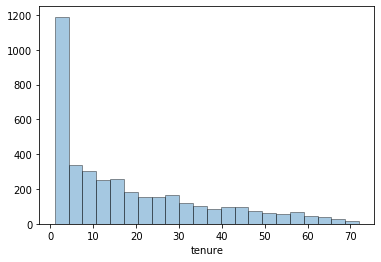

In [23]:
sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False, hist_kws={'edgecolor':'black'});

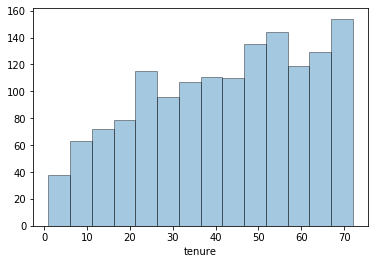

In [24]:
sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False, hist_kws={'edgecolor':'black'});

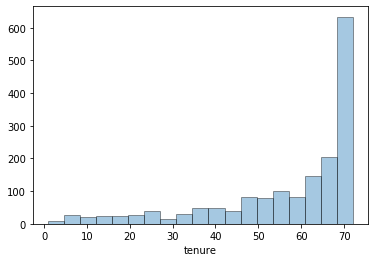

In [25]:
sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False, hist_kws={'edgecolor':'black'});

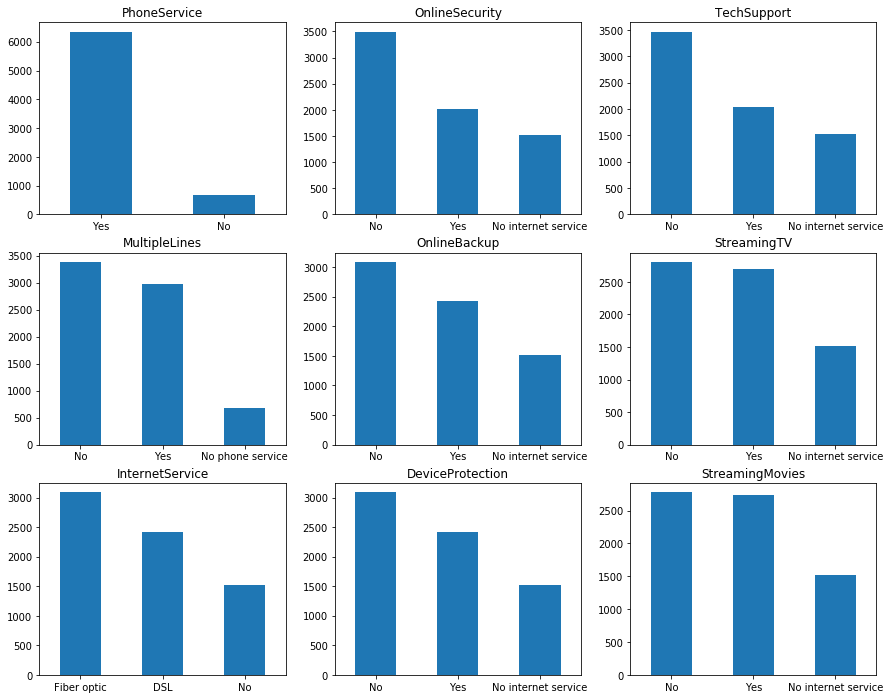

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

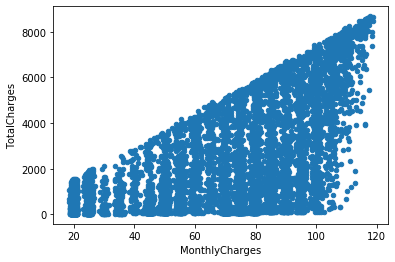

In [27]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges');

In [28]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**Imbalanced Data!!**

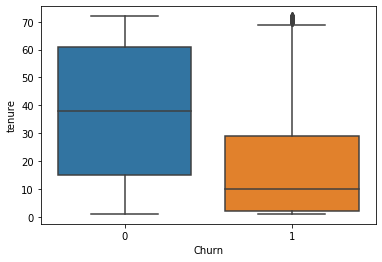

In [29]:
sns.boxplot(x = df.Churn, y = df.tenure);

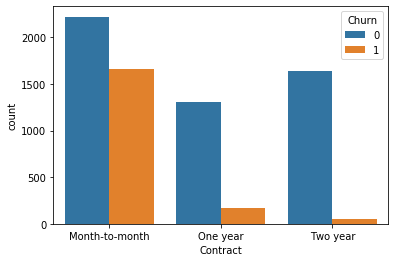

In [30]:
sns.countplot(x="Contract", hue="Churn", data=df);

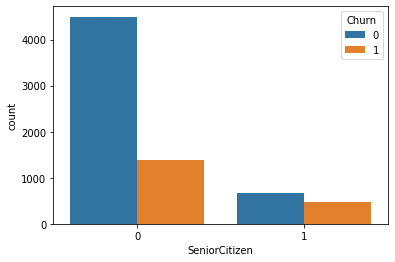

In [31]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=df);

In [32]:
selection = ["tenure","MonthlyCharges","OnlineSecurity","TotalCharges","InternetService","TechSupport","Contract"]

X = df[selection]
y = pd.DataFrame(df["Churn"], columns = ["Churn"])

In [33]:
X.head()

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract
0,1,29.85,No,29.85,DSL,No,Month-to-month
1,34,56.95,Yes,1889.50,DSL,No,One year
2,2,53.85,Yes,108.15,DSL,No,Month-to-month
3,45,42.30,Yes,1840.75,DSL,Yes,One year
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month


In [34]:
X = pd.get_dummies(X)

In [35]:
X.head()

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0


In [36]:
X.shape

(7032, 15)

In [37]:
df3 = pd.concat([X,y], axis=1)

In [62]:
df3 = df3.reset_index(drop = True)

In [63]:
df3.head(3)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,1


In [64]:
df3.shape

(7032, 16)

**Train-Test-Split**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
from sklearn.ensemble import RandomForestClassifier

**Random Forest Classifier**

In [42]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

C:\Users\Alp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [43]:
from sklearn import metrics

In [44]:
y_predict = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_predict))

0.7923777019340159


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1283
           1       0.65      0.49      0.56       475

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



**Pickle Dump**

In [47]:
import pickle
with open("model_son.pkl", 'wb') as file:  
    pickle.dump(model_rf, file)

In [48]:
Churn_Probability = model_rf.predict_proba(X)

In [49]:
Churn_Probability

array([[0.39730979, 0.60269021],
       [0.9154937 , 0.0845063 ],
       [0.61077329, 0.38922671],
       ...,
       [0.74853214, 0.25146786],
       [0.33010739, 0.66989261],
       [0.92912205, 0.07087795]])

In [84]:
Churn_Probability[0,1]

0.6026902106215728

In [50]:
Churn_Predict = model_rf.predict(X)

In [51]:
Churn_Predict

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
df4 = pd.DataFrame(Churn_Probability[:,1], columns = ["Churn Probability"])

In [53]:
df4.head(3)

,Churn Probability
0,0.602690
1,0.084506
2,0.389227


In [54]:
df4.shape

(7032, 1)

In [55]:
X.shape

(7032, 15)

In [65]:
X = X.reset_index(drop = True)

In [66]:
son = pd.concat([X,df4], axis=1)

In [67]:
son.head(3)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,0.602690
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0.084506
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,0.389227


In [68]:
son.shape

(7032, 16)

In [71]:
son.to_csv ('model_son.csv', index = None, header=True)

In [72]:
kek = pd.read_csv("model_son.csv")

In [73]:
kek.head(3)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,0.602690
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0.084506
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,0.389227


In [74]:
kek.shape

(7032, 16)

In [78]:
kek.iloc[[5, 7, 9]]

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
5,8,99.65,820.50,1,0,0,0,1,0,1,0,0,1,0,0,0.732656
7,10,29.75,301.90,0,0,1,1,0,0,1,0,0,1,0,0,0.276696
9,62,56.15,3487.95,0,0,1,1,0,0,1,0,0,0,1,0,0.082421


In [79]:
kek.sort_values("Churn Probability", axis=0, ascending=False)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
5863,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
5773,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
5157,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
6486,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
3025,1,79.55,79.55,1,0,0,0,1,0,1,0,0,1,0,0,0.848580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,72,24.25,1784.50,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
4603,72,24.15,1776.45,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
1103,69,24.25,1641.80,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
2526,71,24.45,1681.60,0,1,0,0,0,1,0,1,0,0,0,1,0.028482


In [81]:
kek.sample(3)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
218,65,84.20,5324.50,1,0,0,1,0,0,0,0,1,0,0,1,0.051637
707,29,75.30,2263.40,1,0,0,0,1,0,1,0,0,1,0,0,0.419941
3439,46,103.15,4594.65,1,0,0,0,1,0,0,0,1,0,1,0,0.187480


In [83]:
kek.sort_values("Churn Probability", axis=0, ascending=True)

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn Probability
2146,68,24.15,1498.85,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
1103,69,24.25,1641.80,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
1382,72,24.30,1643.25,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
2526,71,24.45,1681.60,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
2184,69,24.45,1718.20,0,1,0,0,0,1,0,1,0,0,0,1,0.028482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,1,79.25,79.25,1,0,0,0,1,0,1,0,0,1,0,0,0.848580
5863,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
5773,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
6486,1,69.65,69.65,1,0,0,0,1,0,1,0,0,1,0,0,0.849013
